### Importing Libraries

In [201]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### Reading Data through Pandas

In [6]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]

In [8]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Splitting Dataset into Training and Test Data

In [11]:
X,y = df_wine.iloc[:,1:],df_wine.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

### Standardizing Data before doing LDA

In [54]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
        -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
         0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
         0.1308109 ,  1.62934866],
       ...,
       [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
        -1.86068037, -1.04434751],
       [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
         0.73691694,  0.40313628],
       [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
         0.73691694, -0.89683324]])

### Calculating Mean Vectors

In [126]:
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
print(mean_vecs)

[array([ 0.9065826 , -0.34973457,  0.32010329, -0.71891449,  0.50558678,
        0.88069702,  0.95894709, -0.55161049,  0.54159322,  0.23383109,
        0.58971299,  0.65631399,  1.20749382]), array([-0.87487963, -0.28480003, -0.37347228,  0.31571225, -0.38480347,
       -0.04332505,  0.06345321, -0.09460613,  0.07034749, -0.82860474,
        0.31436962,  0.36084258, -0.72528643]), array([ 0.199215  ,  0.8660339 ,  0.168163  ,  0.41484489, -0.04511771,
       -1.02855532, -1.28756034,  0.82867687, -0.77947565,  0.96494432,
       -1.20899133, -1.36215159, -0.40130076])]


### Calculating number of training data accroding to each label

In [102]:
N = np.bincount(y_train)
N

array([ 0, 41, 50, 33], dtype=int64)

### Computing Sw using manual method

In [238]:
d = 13 # number of features
sw = np.zeros((d,d))
for label, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row,mv = row.reshape(-1,1) , mv.reshape(-1,1)
        class_scatter += ((row-mv).dot((row-mv).T))/(N[label]-1)
    sw += class_scatter

### Computing Sw using Predefined Function (np.cov)

In [114]:
# Computing Scatter matrix is same as computing the covarince matrix
d = 13 # number of features
sw = np.zeros((d,d))
for label, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    sw += class_scatter

### Calculating Sb using manual method

In [130]:
overall_mean = np.mean(X_train_std,axis=0)
overall_mean = overall_mean.reshape(-1,1)
d =13
sb = np.zeros((d,d))
for i,mean_vec in enumerate(mean_vecs):
    n = N[i+1]
    mean_vec = mean_vec.reshape(-1,1)
    sb += n*(mean_vec-overall_mean).dot((mean_vec-overall_mean).T)

### Calculating Eigen Values and Eigen Vectors

In [146]:
eigen_values,eigen_vecs = np.linalg.eig(np.linalg.inv(sw).dot(sb))
eigen_values

array([-2.84217094e-14+0.00000000e+00j,  1.72761522e+02+0.00000000e+00j,
        3.49617809e+02+0.00000000e+00j,  5.01051623e-14+0.00000000e+00j,
       -3.61871664e-14+0.00000000e+00j,  9.14627240e-15+1.63405503e-14j,
        9.14627240e-15-1.63405503e-14j, -8.42267633e-15+5.34968193e-15j,
       -8.42267633e-15-5.34968193e-15j,  2.97846455e-15+5.85299180e-15j,
        2.97846455e-15-5.85299180e-15j, -3.76857898e-16+9.26900222e-16j,
       -3.76857898e-16-9.26900222e-16j])

### Sorting Eigen vectors and Eigen Values

In [154]:
indices = np.argsort(eigen_values)[::-1]
eigen_values_sorted = eigen_values[indices]
eigen_vecs_sorted = eigen_vecs[:, indices]

In [158]:
eigen_values_sorted

array([ 3.49617809e+02+0.00000000e+00j,  1.72761522e+02+0.00000000e+00j,
        5.01051623e-14+0.00000000e+00j,  9.14627240e-15+1.63405503e-14j,
        9.14627240e-15-1.63405503e-14j,  2.97846455e-15+5.85299180e-15j,
        2.97846455e-15-5.85299180e-15j, -3.76857898e-16+9.26900222e-16j,
       -3.76857898e-16-9.26900222e-16j, -8.42267633e-15+5.34968193e-15j,
       -8.42267633e-15-5.34968193e-15j, -2.84217094e-14+0.00000000e+00j,
       -3.61871664e-14+0.00000000e+00j])

### Calculating Cummulative Variance captured by Eigen Vectors 

In [251]:
total_sum = np.sum(eigen_values)
var_exp = [i/total_sum for i in sorted(eigen_values,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.66927956+1.51604911e-33j, 1.        +2.26519559e-33j,
       1.        +2.26519559e-33j, 1.        +3.12810046e-17j,
       1.        +0.00000000e+00j, 1.        +1.12044858e-17j,
       1.        +0.00000000e+00j, 1.        +1.77438150e-18j,
       1.        +0.00000000e+00j, 1.        +1.02409908e-17j,
       1.        +0.00000000e+00j, 1.        -1.23245173e-49j,
       1.        -2.80163728e-49j])

### Plotting Bar and Step Chart to visualize Indiviual as well as Cumulative Variance

C:\Users\divya\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\divya\anaconda3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
C:\Users\divya\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


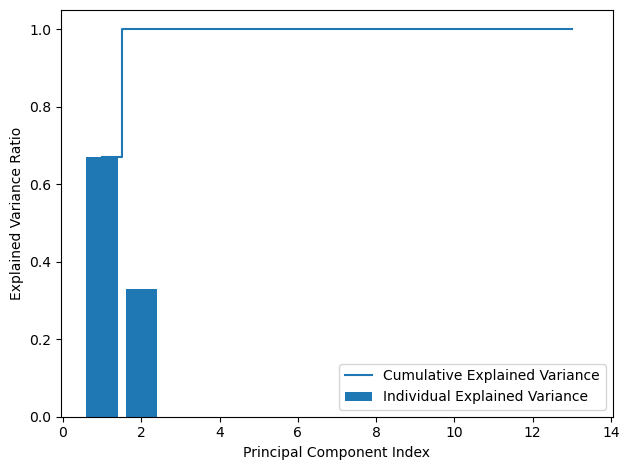

In [164]:
plt.bar(range(1,14),var_exp,align="center",label="Individual Explained Variance")
plt.step(range(1,14),cum_var_exp,where="mid",label = "Cumulative Explained Variance")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component Index")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

### Constructing Projection Matrix from top 2 Eigen Vectors

In [183]:
w = np.hstack((eigen_vecs_sorted[:,0].reshape(-1,1),eigen_vecs_sorted[:,1].reshape(-1,1)))
w

array([[-0.14808266+0.j, -0.40918668+0.j],
       [ 0.09076942+0.j, -0.15765978+0.j],
       [-0.01678204+0.j, -0.35371242+0.j],
       [ 0.14840098+0.j,  0.32231568+0.j],
       [-0.0163456 +0.j, -0.08168973+0.j],
       [ 0.19130756+0.j,  0.08419165+0.j],
       [-0.73377547+0.j,  0.28234956+0.j],
       [-0.07501992+0.j, -0.01015645+0.j],
       [ 0.00184929+0.j,  0.09065024+0.j],
       [ 0.29402743+0.j, -0.2152308 +0.j],
       [-0.03282632+0.j,  0.27470975+0.j],
       [-0.35466909+0.j, -0.01243875+0.j],
       [-0.39151562+0.j, -0.59578685+0.j]])

### Transforming d-dimension input dataset X using projection matrix W to obtain new 2-dimensional feature subspace

In [190]:
X_train_lda = X_train_std.dot(w)
X_train_lda.shape

(124, 2)

### Plotting Transformed Datapoints

C:\Users\divya\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\divya\anaconda3\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


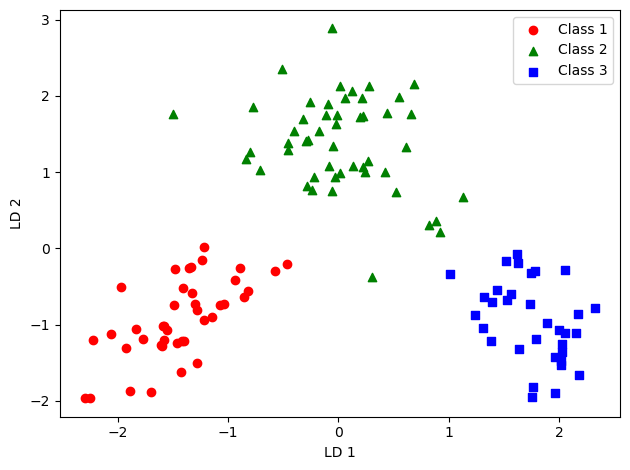

In [194]:
colors = ["r","g","b"]
markers = ["o","^","s"]
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train==l,0],X_train_lda[y_train==l,1],c=c,label=f"Class {l}",marker=m)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Defining Decision Region Function

In [206]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # xx1 contains all x points and xx2 contains all y points
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    
    # xx1 and xx2 becomes stacked together to becomes points for classifying and then transposed to make vertical 
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  
    # Reshapes the 1D predictions into a 2D array for alignment with the grid
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,cmap=cmap)
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)

    for i,j in enumerate(np.unique(y)):
        plt.scatter(x = X[y==j,0],y=X[y==j,1],marker = markers[i],c=colors[i],edgecolor='black',label=f"Class {j}",alpha=0.9)
    

### Training LDA using Sklearn

In [203]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y_train)

### Training Logistic Regression Model and Plotting Decision Region for Training Dataset

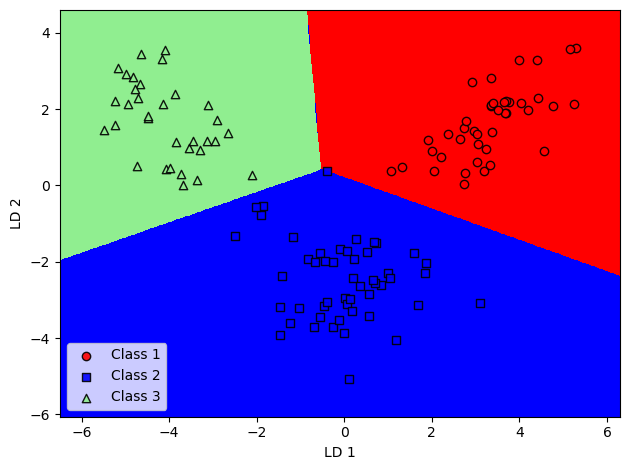

In [274]:
lr = LogisticRegression(multi_class="ovr",random_state=0,solver="lbfgs")
lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Plotting Decision Region for Testing Dataset

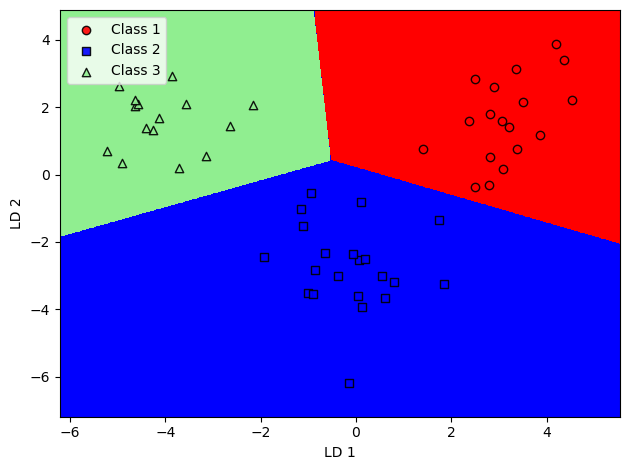

In [214]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda,y_test,classifier=lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()